In [52]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

data_DIR = "../data/injuries/"
fig_DIR = "../figs/players/"
img_DIR_P = "../data/images/players/"

In [53]:
df1 = []
for season in range(2015,2025):
    df0 = pd.read_parquet(data_DIR + f"NBA_prosptran_injuries_{season}.parquet")
    df0["season"] = season + 1
    df1.append(df0)
df1 = pd.concat(df1)

In [72]:
df1 = []
for season in range(2015,2025):
    df0 = pd.read_parquet(data_DIR + f"NBA_prosptran_injuries_{season}.parquet")
    df0["season"] = season + 1
    df01 = df0[(df0["Notes"].str.contains("achilles", case=False))]
    df01 = df01[(df01["Notes"].str.contains("torn", case=False)) | (df01["Notes"].str.contains("ruptured", case=False))] 
    df01 = df01[~(df01["Notes"].str.contains("sore", case=False))]
    df01 = df01[~(df01["Notes"].str.contains("dtd", case=False))]
    df01 = df01[~(df01["Notes"].str.contains("strained", case=False))]
    df01 = df01[~(df01["Notes"].str.contains("surgery", case=False))]
    df01 = df01[~(df01["Notes"].str.contains("recovering", case=False))]
    df1.append(df01)
df1 = pd.concat(df1)

In [74]:
df2 = df1[["season","Player","playerID"]]
df31 = df2[~df2.duplicated(keep="last")].reset_index(drop=True)

In [75]:
pn = "Dejounte Murray"
df32 = pd.DataFrame({"season":2025,"Player":pn,'playerID': get_pID(pn)},index=[0])
df3 = pd.concat([df31,df32]).reset_index(drop=True)
df3 = df3.reset_index()
df3["index"] +=1
df3["playerID"] = df3["playerID"].astype(str)

GT(_tbl_data=    index  season               Player playerID
0       1    2016     Brandon Jennings   201943
1       2    2016       Mario Chalmers   201596
2       3    2017             Rudy Gay   200752
3       4    2018          Sheldon Mac  1627815
4       5    2018     DeMarcus Cousins   202326
5       6    2019          C.J. Wilcox   203912
6       7    2019  John Wall (Hildred)   202322
7       8    2019          Jose Barea    200826
8       9    2019         Kevin Durant   201142
9      10    2020        Darius Miller   203121
10     11    2020          Rodney Hood   203918
11     12    2020          David Nwaba  1628021
12     13    2020        Dwight Powell   203939
13     14    2021        Klay Thompson   202691
14     15    2021        Chris Clemons  1629598
15     16    2022        Edmond Sumner  1628410
16     17    2023       Brandon Clarke  1629634
17     18    2025      DaRon Holmes II  1641747
18     19    2025        James Wiseman  1630164
19     20    2025       Isaiah Jackson  1630543
20     21    2025            Dru Smith  1630696
21     22    2025      Dejounte Murray  1627749, _body=<great_tables._gt_data.Body object at 0x000001B057D04A40>, _boxhead=Boxhead([ColInfo(var='index', type=<ColInfoTypeEnum.default: 1>, column_label='#', column_align='center', column_width=None), ColInfo(var='season', type=<ColInfoTypeEnum.default: 1>, column_label='Season', column_align='center', column_width=None), ColInfo(var='Player', type=<ColInfoTypeEnum.default: 1>, column_label='Player', column_align='left', column_width=None), ColInfo(var='playerID', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B057D060C0>, _spanners=Spanners([]), _heading=Heading(title=Md(text='Achilles Injuries in NBA Since 2015-16'), subtitle=None, preheader=None), _stubhead=None, _source_notes=['bsky:@sradjoker.cc | X:@SravanNBA | source:prosportstransactions'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B057D054C0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x000001B057D05A60>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='ghostwhite'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['Consolas']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value=10), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=Option
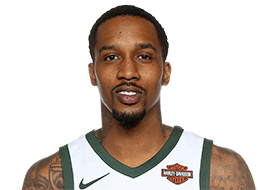
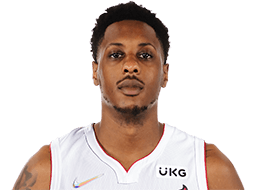
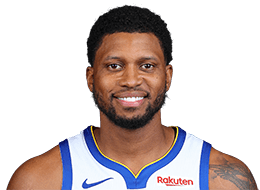
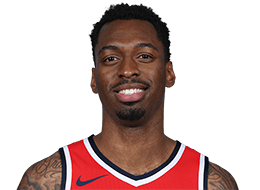
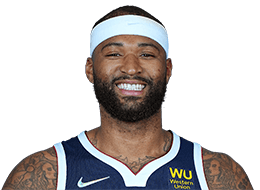
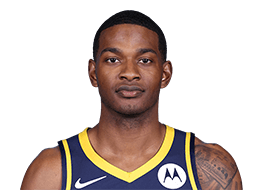
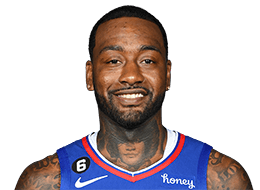
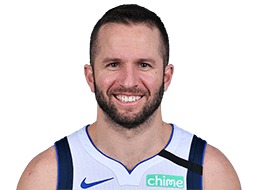
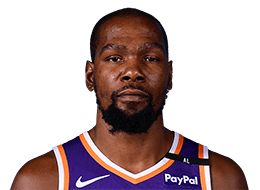
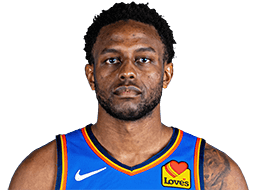
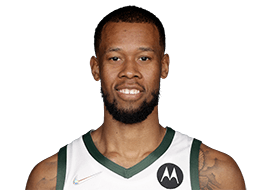
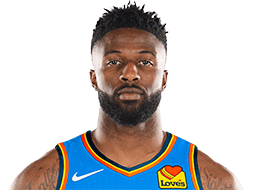
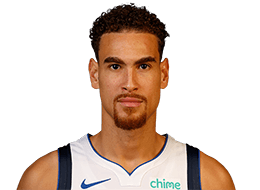
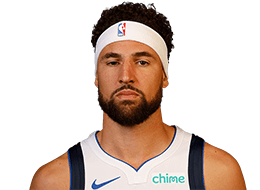
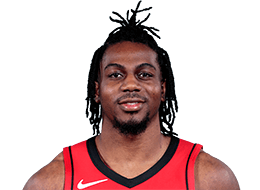
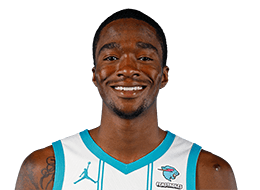
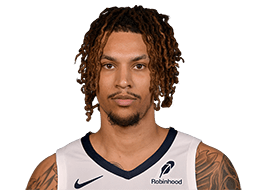
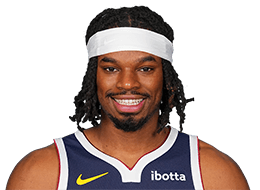
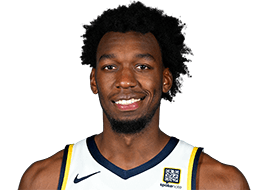
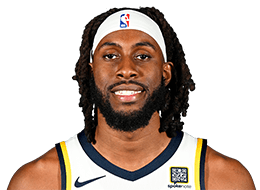
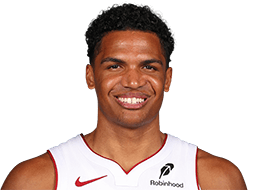
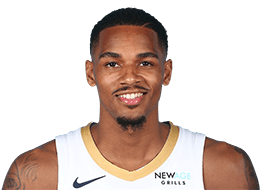

In [76]:
g = (
    GT(df3)
    .tab_header(
        title=md("Achilles Injuries in NBA Since 2015-16"),
        # subtitle="Since 2000"
    )
    .tab_source_note(source_note="bsky:@sradjoker.cc | X:@SravanNBA | source:prosportstransactions")
    .cols_label(
        index = "#",
        playerID = "",
        season="Season",
    )
    .fmt_image(
        columns="playerID",
        path = img_DIR_P,
        file_pattern="{}.png"
    )
    .cols_align(align="center")
    .cols_align(align="left", columns="Player")
    .tab_options(
        heading_title_font_size="150%",
        heading_subtitle_font_size="110%",
        # heading_title_font_weight='bold',
        table_background_color="ghostwhite",
        column_labels_font_size="105%",
        column_labels_font_weight='bold',
        row_group_font_weight='bold',
        row_group_background_color="#E5E1D8",
        table_font_size=10,
        table_font_names="Consolas", 
        data_row_padding = "3px",
        # table_margin_left = 7,
        # table_margin_right = 0,
    )
)
g.save(fig_DIR + f"Achilles_Injuries.png",scale=3,web_driver="firefox")
g